In [ ]:
pip install opencv-python

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [34]:
image_path = "dog.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img

array([[ 59,  61,  61, ..., 183, 180, 178],
       [ 55,  59,  61, ..., 183, 178, 175],
       [ 51,  55,  59, ..., 180, 178, 175],
       ...,
       [ 59,  59,  61, ..., 138, 141, 147],
       [ 59,  59,  59, ..., 130, 135, 138],
       [ 59,  59,  59, ..., 123, 130, 130]], dtype=uint8)

In [37]:
def svd(A):
    m,n = A.shape
    

    # Calculate A.T * A and A * A.T
    ATA = np.dot(A.T, A)
    AAT = np.dot(A, A.T)

    # Eigenvalue decomposition for ATA and AAT
    eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)
    eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)

    # Sort eigenvalues and eigenvectors in descending order
    idx_ATA = eigenvalues_ATA.argsort()[::-1]
    eigenvalues_ATA = eigenvalues_ATA[idx_ATA]
    eigenvectors_ATA = eigenvectors_ATA[:,idx_ATA]

    idx_AAT = eigenvalues_AAT.argsort()[::-1]
    eigenvalues_AAT = eigenvalues_AAT[idx_AAT]
    eigenvectors_AAT = eigenvectors_AAT[:, idx_AAT]

    S_values = np.sqrt(np.abs(eigenvalues_ATA))  # Only take non-negative values
    S = np.zeros((m, n))  # Initialize Sigma as m x n
    np.fill_diagonal(S, S_values[:min(m, n)])


    U = eigenvectors_AAT
    V = eigenvectors_ATA
    U /= np.linalg.norm(U, axis=0, keepdims=True)
    V /= np.linalg.norm(V, axis=0, keepdims=True)

    return U, S, V.T

In [41]:
A = np.array(img)
U, S, V = svd(img)
A_const = np.dot(U,np.dot(S,V))
print(S.shape)

(427, 640)


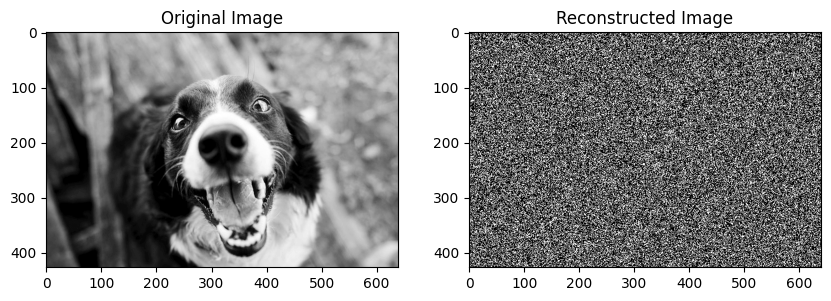

In [42]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(A_const.astype(np.uint8), cmap='gray')
plt.title('Reconstructed Image')

plt.show()

In [15]:
import numpy as np

def normalize_columns(matrix):
    """Normalize columns of a given matrix to have unit norm."""
    return matrix / np.linalg.norm(matrix, axis=0, keepdims=True)

def pca(A, k):

    A = A - np.mean(A, axis=0)
    ATA = np.dot(A.T, A)  # Compute A^T * A
    AAT = np.dot(A, A.T)  # Compute A * A^T
    
    # Eigenvalue decomposition
    eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)
    eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    idx_ATA = np.argsort(eigenvalues_ATA)[::-1]   
    eigenvalues_ATA = eigenvalues_ATA[idx_ATA]
    eigenvectors_ATA = eigenvectors_ATA[:, idx_ATA]

    idx_AAT = np.argsort(eigenvalues_AAT)[::-1]
    eigenvalues_AAT = eigenvalues_AAT[idx_AAT]
    eigenvectors_AAT = eigenvectors_AAT[:, idx_AAT]
    
    # Compute singular values
    S = np.sqrt(np.abs(eigenvalues_ATA[:k]))  # Top k singular values

    # Step 5: Construct Sigma matrix (k x k)
    Sigma = np.diag(S)  # Ensure Sigma is k x k, not m x k

    U = normalize_columns(eigenvectors_AAT[:, :k])  # First k normalized eigenvectors of AAT
    V = normalize_columns(eigenvectors_ATA[:, :k])
    return U, Sigma, V



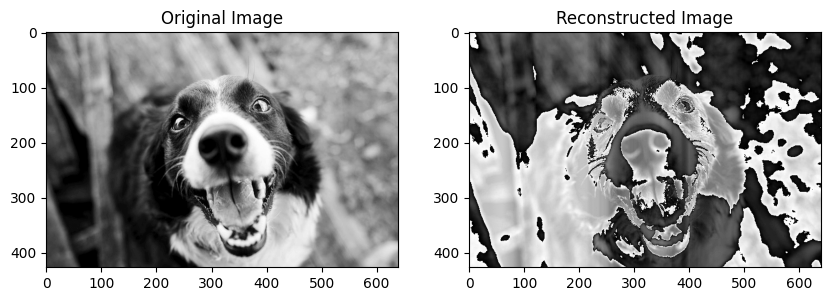

In [18]:
A = np.array(img)
D, B, C = pca(A, 200)  

projection = np.dot(D.T, A) 
reconstruction = np.dot(D,projection)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstruction.astype(np.uint8), cmap='gray')
plt.title('Reconstructed Image')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8484\2260156309.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(reconstructiondual.astype(np.uint8), cmap='gray')


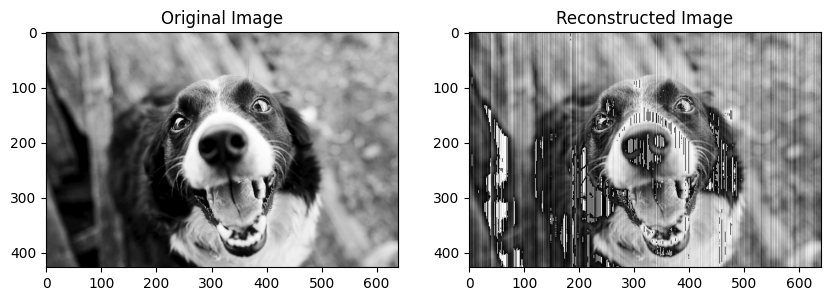

In [19]:
E,F,G = pca(A,400)
projectiondual = np.dot(F,G.T)
reconstructiondual = np.dot(np.dot(A,G),G.T)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructiondual.astype(np.uint8), cmap='gray')
plt.title('Reconstructed Image')

plt.show()